In [2]:
import math
import os
import json
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [14]:
def MED(x1_list, y1_list, x2_list, y2_list):
    min_step = min(len(x1_list), len(x2_list))
    x1_list = x1_list[:min_step]
    x2_list = x2_list[:min_step]
    y1_list = y1_list[:min_step]
    y2_list = y2_list[:min_step]
    sum_distances = 0
    distances = []
    for x1, y1, x2, y2 in zip(x1_list, y1_list, x2_list, y2_list):
        distance = round(np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2), 2)
        distances.append(distance)
        sum_distances += distance

    return round((sum_distances / min_step), 2), distances


In [3]:
base_dir = Path('new_logs')
trivial_path = base_dir / 'trivial'
normal_path = base_dir / 'normal'
critical_path = base_dir / 'critical'

In [4]:
offline_rows = []
online_rows = []

offline_results = []
online_results = []



for filename in trivial_path.glob('*.json'):
    rows = []
    stype, file = filename.name.split('_')
    s_id = int(file.split('.')[0])

    with open(filename) as f:
        data = json.load(f)

    curr_step = 1

    for entry in data[:-1]:
        step = curr_step
        try:
            x, y = entry['positions']["agent0"]["position"]
            velocity = entry['positions']["agent0"]["velocity"][0]
        except Exception as E:
            print(entry['positions'])
            if not entry['positions']:
                print(filename)
                print(step)
            x, y = entry['positions']["agent1"]["position"]
            velocity = entry['positions']["agent1"]["velocity"][0]
            print("Used agent1")
        info = entry['info']['agent0']
        crash = info['crash']
        s,a = info['action']
        arrive_dest = info['arrive_dest']

        row = {
            'scenario_id': s_id,
            'step': step,
            'x': x,
            'y': y,
            'v': velocity,
            'crash': crash,
            'a': a,
            's': s,
            'arrive_dest': arrive_dest,
        }


        rows.append(row)

        curr_step += 1

    res = {
        'arrive_dest': data[-1]['info']['agent0']['arrive_dest'],
        'crash': data[-1]['info']['agent0']['crash'],
        "step": curr_step,
        "scenario_id": s_id,
    }


    if stype == 'offlinescenario':
        offline_rows = [*offline_rows, *rows]
        offline_results.append(res)
    else:
        online_rows = [*online_rows, *rows]
        online_results.append(res)





In [5]:
trivial_offline = pd.DataFrame(offline_rows)
trivial_online = pd.DataFrame(online_rows)

trivial_res_offline = pd.DataFrame(offline_results)
trivial_res_online = pd.DataFrame(online_results)

trivial_online

,scenario_id,step,x,y,v,crash,a,s,arrive_dest
0,10,1,25.000458,4.531686e-11,0.026031,False,0.0,0.0,False
1,10,2,25.003660,6.331779e-11,0.041481,False,0.0,0.0,False
2,10,3,25.007954,-6.411982e-10,0.019663,False,0.0,0.0,False
3,10,4,25.009192,-1.086671e-09,-0.016701,False,0.0,0.0,False
4,10,5,25.007534,-7.398618e-10,-0.013145,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
2770,9,247,257.234039,-1.521645e-04,20.157824,False,0.3,0.0,False
2771,9,248,259.251587,-1.534902e-04,20.245104,False,0.3,0.0,False
2772,9,249,261.277832,-1.548129e-04,20.332384,False,0.3,0.0,False
2773,9,250,263.312805,-1.561532e-04,20.419664,False,0.3,0.0,False


In [30]:
offline_rows = []
online_rows = []

offline_results = []
online_results = []



for filename in normal_path.glob('*.json'):
    rows = []
    stype, file = filename.name.split('_')
    s_id = int(file.split('.')[0])

    with open(filename) as f:
        data = json.load(f)

    curr_step = 1

    for entry in data[:-1]:
        step = curr_step
        try:
            x, y = entry['positions']["agent0"]["position"]
            velocity = entry['positions']["agent0"]["velocity"][0]
        except Exception as E:
            print(entry['positions'])
            if not entry['positions']:
                print(filename)
                print(step)
            x, y = entry['positions']["agent1"]["position"]
            velocity = entry['positions']["agent1"]["velocity"][0]
            print("Used agent1")
        info = entry['info']['agent0']
        crash = info['crash']
        s,a = info['action']
        arrive_dest = info['arrive_dest']

        row = {
            'scenario_id': s_id,
            'step': step,
            'x': x,
            'y': y,
            'v': velocity,
            'crash': crash,
            'a': a,
            's': s,
            'arrive_dest': arrive_dest,
        }


        rows.append(row)

        curr_step += 1

    res = {
        'arrive_dest': data[-1]['info']['agent0']['arrive_dest'],
        'crash': data[-1]['info']['agent0']['crash'],
        "step": curr_step,
        "scenario_id": s_id,
    }


    if stype == 'offlinescenario':
        offline_rows = [*offline_rows, *rows]
        offline_results.append(res)
    else:
        online_rows = [*online_rows, *rows]
        online_results.append(res)





In [31]:
normal_offline = pd.DataFrame(offline_rows)
normal_online = pd.DataFrame(online_rows)
normal_res_offline = pd.DataFrame(offline_results)
normal_res_online = pd.DataFrame(online_results)

normal_offline


,scenario_id,step,x,y,v,crash,a,s,arrive_dest
0,11,1,10.799128,0.000000e+00,9.963627,False,0.0,0.0,False
1,11,2,11.782545,9.464962e-08,9.418163,False,-0.2,0.0,False
2,11,3,12.713452,2.383085e-07,8.872700,False,-0.2,0.0,False
3,11,4,13.589812,3.210644e-07,8.327236,False,-0.2,0.0,False
4,11,5,14.411627,-4.823151e-08,7.781777,False,-0.2,0.0,False
...,...,...,...,...,...,...,...,...,...
2432,20,294,253.142334,-6.687241e-02,22.330107,False,1.0,0.0,False
2433,20,295,255.374619,-6.767281e-02,22.293753,False,1.0,0.0,False
2434,20,296,257.603271,-6.847317e-02,22.257399,False,1.0,0.0,False
2435,20,297,259.828278,-6.927333e-02,22.221045,False,1.0,0.0,False


In [32]:
offline_rows = []
online_rows = []

offline_results = []
online_results = []



for filename in critical_path.glob('*.json'):
    rows = []
    stype, file = filename.name.split('_')
    s_id = int(file.split('.')[0])

    with open(filename) as f:
        data = json.load(f)

    curr_step = 1

    for entry in data[:-1]:
        step = curr_step
        try:
            x, y = entry['positions']["agent0"]["position"]
            velocity = entry['positions']["agent0"]["velocity"][0]
        except Exception as E:
            print(entry['positions'])
            if not entry['positions']:
                print(filename)
                print(step)
            x, y = entry['positions']["agent1"]["position"]
            velocity = entry['positions']["agent1"]["velocity"][0]
            print("Used agent1")
        info = entry['info']['agent0']
        crash = info['crash']
        s,a = info['action']
        arrive_dest = info['arrive_dest']

        row = {
            'scenario_id': s_id,
            'step': step,
            'x': x,
            'y': y,
            'v': velocity,
            'crash': crash,
            'a': a,
            's': s,
            'arrive_dest': arrive_dest,
        }


        rows.append(row)

        curr_step += 1

    res = {
        'arrive_dest': data[-1]['info']['agent0']['arrive_dest'],
        'crash': data[-1]['info']['agent0']['crash'],
        "step": curr_step,
        "scenario_id": s_id,
    }


    if stype == 'offlinescenario':
        offline_rows = [*offline_rows, *rows]
        offline_results.append(res)
    else:
        online_rows = [*online_rows, *rows]
        online_results.append(res)



In [33]:
critical_offline = pd.DataFrame(offline_rows)
critical_online = pd.DataFrame(online_rows)

critical_res_offline = pd.DataFrame(offline_results)
critical_res_online = pd.DataFrame(online_results)

critical_offline

,scenario_id,step,x,y,v,crash,a,s,arrive_dest
0,10,1,15.799128,0.000000e+00,9.963627,False,0.0,0.0,False
1,10,2,16.796183,1.139551e-02,9.993963,False,0.2,0.1,False
2,10,3,17.796326,5.383640e-02,10.030606,False,0.2,0.1,False
3,10,4,18.800072,1.250194e-01,10.063570,False,0.2,0.1,False
4,10,5,19.806978,2.236082e-01,10.089321,False,0.2,0.1,False
...,...,...,...,...,...,...,...,...,...
691,9,13,27.506689,2.376128e-06,9.527149,False,0.0,0.0,False
692,9,14,28.458677,1.558376e-06,9.490776,False,0.0,0.0,False
693,9,15,29.407026,7.422157e-07,9.454403,False,0.0,0.0,False
694,9,16,30.351740,-1.825249e-08,9.418030,False,0.0,0.0,False


In [247]:

average_offline_trajectory = trivial_offline.groupby("step")[["x", "y"]].mean().reset_index()
average_online_trajectory = trivial_online.groupby("step")[["x", "y"]].mean().reset_index()

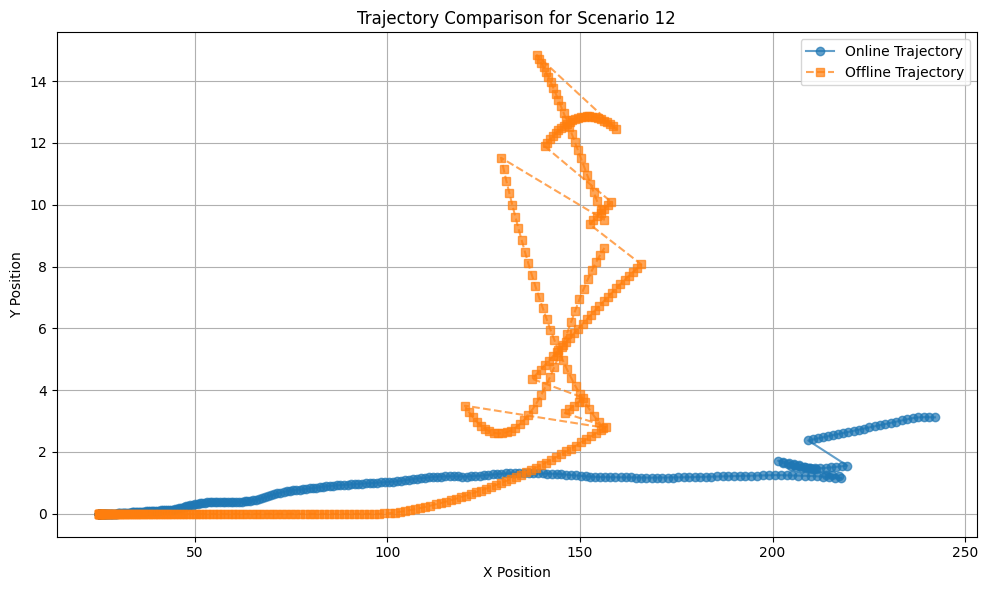

In [260]:
plt.figure(figsize=(10, 6))
plt.plot(average_online_trajectory['x'], average_online_trajectory['y'], label='Online Trajectory', marker='o', linestyle='-', alpha=0.7)
plt.plot(average_offline_trajectory['x'], average_offline_trajectory['y'], label='Offline Trajectory', marker='s', linestyle='--', alpha=0.7)
plt.title(f"Trajectory Comparison for Scenario {12}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


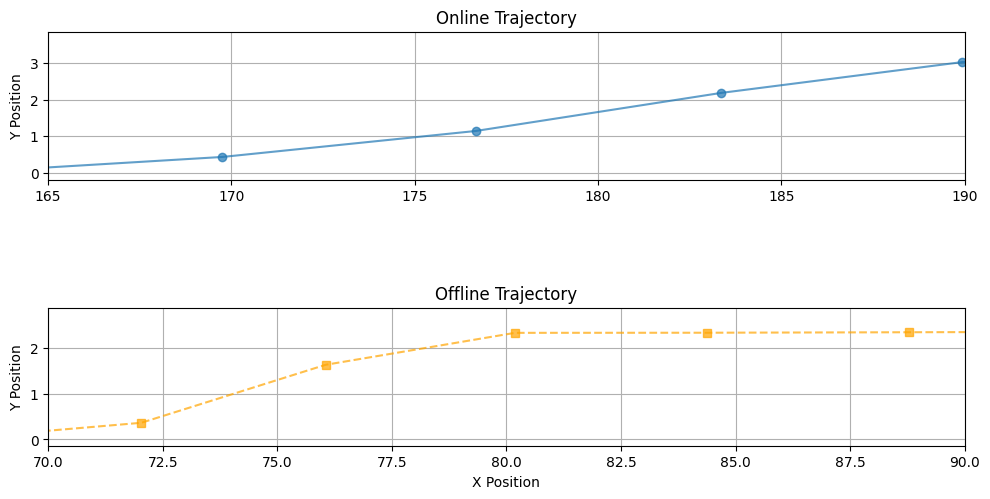

In [7]:
import matplotlib.pyplot as plt

# Existing trajectory filtering and truncation
online_traj = trivial_online[trivial_online['scenario_id'] == 3]
online_traj = online_traj[online_traj['step'] % 5 == 0]

offline_traj = trivial_offline[trivial_offline['scenario_id'] == 13]
offline_traj = offline_traj[offline_traj['step'] % 5 == 0]

min_len = min(len(online_traj), len(offline_traj))
online_traj = online_traj.iloc[:min_len]
offline_traj = offline_traj.iloc[:min_len]

# Create stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Online trajectory
ax1.plot(online_traj['x'], online_traj['y'], label='Online Trajectory', marker='o', linestyle='-', alpha=0.7)
ax1.set_ylabel("Y Position")
ax1.set_title("Online Trajectory")
ax1.grid(True)
ax1.set_xlim([165, 190])
ax1.set_aspect('equal', adjustable='box')

# Offline trajectory
ax2.plot(offline_traj['x'], offline_traj['y'], label='Offline Trajectory', marker='s', linestyle='--', color='orange', alpha=0.7)
ax2.set_xlabel("X Position")
ax2.set_ylabel("Y Position")
ax2.set_title("Offline Trajectory")
ax2.grid(True)
ax2.set_xlim([70, 90])
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


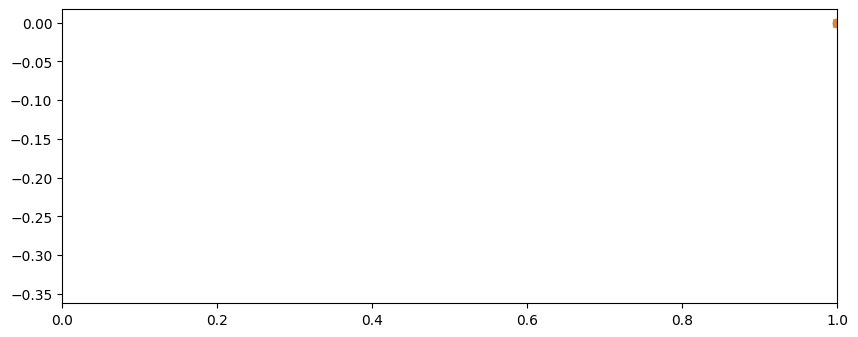

In [45]:
import matplotlib.pyplot as plt

# Existing trajectory filtering and truncation
online_traj = trivial_online[trivial_online['scenario_id'] == 4]

offline_traj = trivial_offline[trivial_offline['scenario_id'] == 20]

min_len = min(len(online_traj), len(offline_traj))
online_traj = online_traj.iloc[:min_len]
offline_traj = offline_traj.iloc[:min_len]

# med, distances = MED(online_traj['x'], offline_traj['y'], offline_traj['x'], offline_traj['y'])

plt.figure(figsize=(10, 6))
# plt.plot(distances, label='MED')

plt.plot(offline_traj['step'], online_traj['y']*1000, label='Online Trajectory', marker='o', linestyle='-', alpha=0.7)
plt.plot(offline_traj['step'], offline_traj['y']*1000, label='Offline Trajectory', marker='s', linestyle='--', alpha=0.7)
plt.xlim([0,1])
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [32]:
med, distances = MED(online_traj['x'], online_traj['y'], offline_traj['x'], offline_traj['y'])

med

np.float64(17.18)

In [156]:
from scipy.stats import wilcoxon

mu = 15  # The value you're testing against

# Adjust data by subtracting mu
adjusted = [x - mu for x in distances]


wilcoxon(adjusted, alternative='greater')

WilcoxonResult(statistic=np.float64(20107.5), pvalue=np.float64(2.7167696901624417e-09))

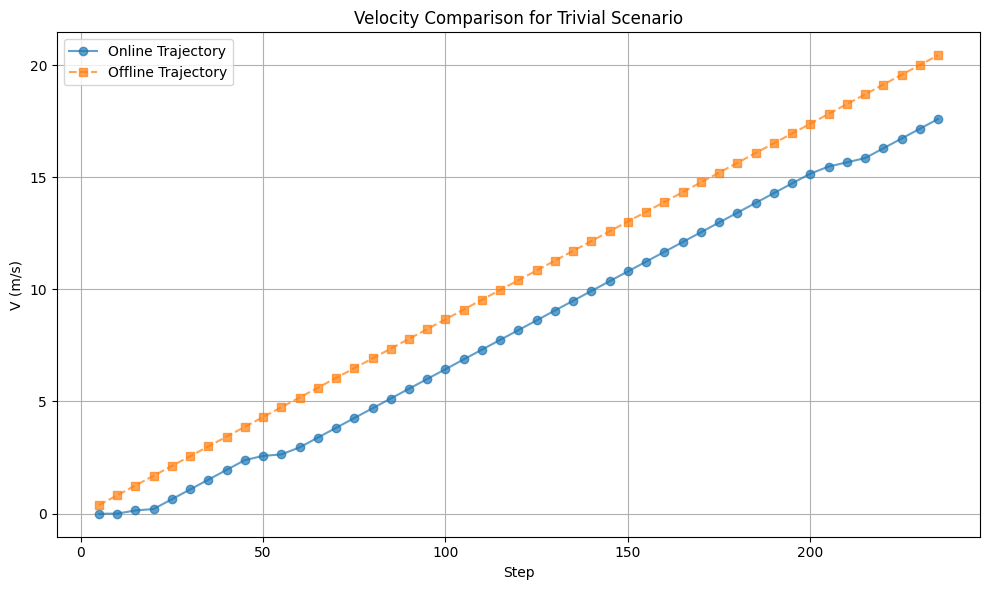

In [48]:
#3 13

offline_traj = offline_traj[offline_traj['step'] % 5 == 0]
online_traj = online_traj[online_traj['step'] % 5 == 0]

plt.figure(figsize=(10, 6))
plt.plot(online_traj['step'], online_traj['v'], label='Online Trajectory', marker='o', linestyle='-', alpha=0.7)
plt.plot(offline_traj['step'], offline_traj['v'], label='Offline Trajectory', marker='s', linestyle='--', alpha=0.7)
plt.title(f"Velocity Comparison for Trivial Scenario")
plt.xlabel("Step")
plt.ylabel("V (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


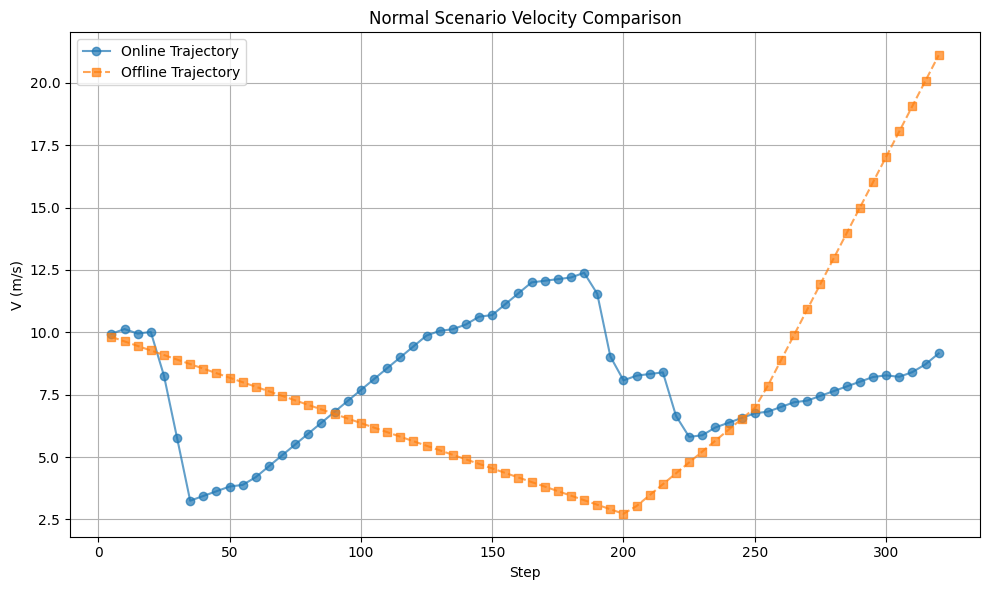

In [61]:
online_traj = normal_online[normal_online['scenario_id'] == 9]
online_traj = online_traj[online_traj['step'] % 5 == 0]

offline_traj = normal_offline[normal_offline['scenario_id'] == 13]
offline_traj = offline_traj[offline_traj['step'] % 5 == 0]

min_len = min(len(online_traj), len(offline_traj))

# Truncate both DataFrames
online_traj = online_traj.iloc[:min_len]
offline_traj = offline_traj.iloc[:min_len]

plt.figure(figsize=(10, 6))
plt.plot(online_traj['step'], online_traj['v'], label='Online Trajectory', marker='o', linestyle='-', alpha=0.7)
plt.plot(offline_traj['step'], offline_traj['v'], label='Offline Trajectory', marker='s', linestyle='--', alpha=0.7)
plt.title(f"Normal Scenario Velocity Comparison")
plt.xlabel("Step")
plt.ylabel("V (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [358]:
med, distances = MED(online_traj['x'], online_traj['y'], offline_traj['x'], offline_traj['y'])

med

np.float64(23.55)

In [300]:
critical_online

,scenario_id,step,x,y,v,crash,a,s,arrive_dest
0,1,1,15.799128,0.000000e+00,9.963627,False,0.0,0.0,False
1,1,2,16.794764,1.192377e-07,9.927254,False,0.0,0.0,False
2,1,3,17.782991,1.831481e-02,9.739895,False,0.0,0.3,False
3,1,4,18.757160,7.717083e-02,9.712460,False,0.0,0.0,False
4,1,5,19.725103,1.354378e-01,9.565850,False,0.0,0.3,False
...,...,...,...,...,...,...,...,...,...
753,44,95,63.263695,-1.620502e+01,4.327174,False,0.0,0.3,False
754,44,96,63.696991,-1.637565e+01,4.354551,False,0.0,0.3,False
755,44,97,64.132858,-1.652786e+01,4.373800,False,0.0,0.3,False
756,44,98,64.570496,-1.666188e+01,4.385189,False,0.0,0.3,False


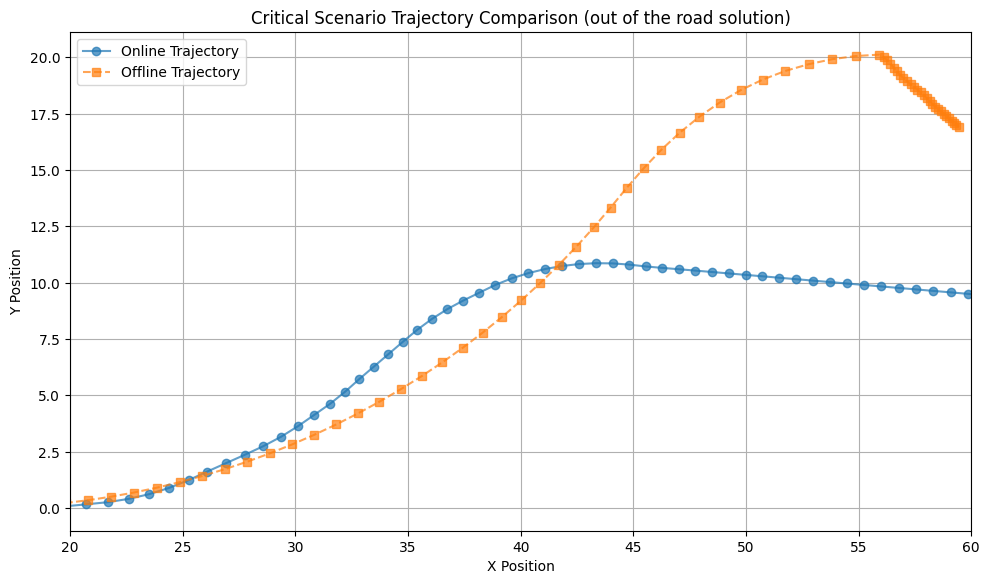

In [44]:
online_traj = critical_online[critical_online['scenario_id'] == 38]
offline_traj = critical_offline[critical_offline['scenario_id'] == 10]
online_traj = online_traj.iloc[:min_len]
offline_traj = offline_traj.iloc[:min_len]
# online_traj = online_traj[online_traj['step'] % 5 == 0]
#
#
# offline_traj = offline_traj[offline_traj['step'] % 5 == 0]





plt.figure(figsize=(10, 6))
plt.plot(online_traj['x'], online_traj['y'], label='Online Trajectory', marker='o', linestyle='-', alpha=0.7)
plt.plot(offline_traj['x'], offline_traj['y'], label='Offline Trajectory', marker='s', linestyle='--', alpha=0.7)
plt.title(f"Critical Scenario Trajectory Comparison (out of the road solution)")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim((20,60))
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [355]:
med, distances = MED(online_traj['x'], online_traj['y'], offline_traj['x'], offline_traj['y'])
print(distances)

[np.float64(0.0), np.float64(0.01), np.float64(0.05), np.float64(0.12), np.float64(0.16), np.float64(0.21), np.float64(0.3), np.float64(0.37), np.float64(0.44), np.float64(0.52), np.float64(0.63), np.float64(0.78), np.float64(0.95), np.float64(1.11), np.float64(1.28), np.float64(1.47), np.float64(1.7), np.float64(1.95), np.float64(2.19), np.float64(2.47), np.float64(2.76), np.float64(3.04), np.float64(3.31), np.float64(3.57), np.float64(3.83), np.float64(4.06), np.float64(4.28), np.float64(4.51), np.float64(4.77), np.float64(5.05), np.float64(5.39), np.float64(5.79), np.float64(6.26), np.float64(6.78), np.float64(7.35), np.float64(7.95), np.float64(8.57), np.float64(9.19), np.float64(9.78), np.float64(10.31), np.float64(10.77), np.float64(11.17), np.float64(11.51), np.float64(11.79), np.float64(11.45), np.float64(11.08), np.float64(10.71), np.float64(10.34), np.float64(10.01), np.float64(9.71), np.float64(9.45), np.float64(9.24), np.float64(9.08), np.float64(8.95), np.float64(8.87), np

In [183]:
offline_traj

,scenario_id,step,x,y,v,crash,a,s,arrive_dest
54,10,55,57.612003,18.569557,1.457012,True,0.0,-0.3,False
124,11,55,5.475777,12.585258,-6.806447,False,0.0,-0.3,False
223,12,55,27.056870,-2.187350,-0.040791,True,-0.6,0.7,False
322,3,55,24.257185,2.491140,1.756320,False,0.2,0.0,False
421,4,55,15.836028,-35.209076,-7.185563,False,0.0,-1.0,False
520,5,55,17.742964,42.888641,3.376730,False,0.0,-0.2,False
634,7,55,51.687592,44.181824,-3.119111,False,0.3,0.1,False


In [90]:
crashed_trivial = trivial_online[trivial_online['arrive_dest'] == True]
trivial_online

,scenario_id,step,x,y,v,crash,a,s,arrive_dest
0,10,1,25.000458,4.531686e-11,0.026031,False,0.0,0.0,False
1,10,2,25.003660,6.331779e-11,0.041481,False,0.0,0.0,False
2,10,3,25.007954,-6.411982e-10,0.019663,False,0.0,0.0,False
3,10,4,25.009192,-1.086671e-09,-0.016701,False,0.0,0.0,False
4,10,5,25.007534,-7.398618e-10,-0.013145,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
2770,9,247,257.234039,-1.521645e-04,20.157824,False,0.3,0.0,False
2771,9,248,259.251587,-1.534902e-04,20.245104,False,0.3,0.0,False
2772,9,249,261.277832,-1.548129e-04,20.332384,False,0.3,0.0,False
2773,9,250,263.312805,-1.561532e-04,20.419664,False,0.3,0.0,False
